<a href="https://colab.research.google.com/github/franchaise/project/blob/main/credit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.io import arff
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_class_weight

In [ ]:

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_file_path = '/content/drive/MyDrive/credit_project/dataset.arff'

In [ ]:
data_arff, meta = arff.loadarff(data_file_path)

data_df = pd.DataFrame(data_arff)

print(data_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
pd.options.display.max_columns = None

In [ ]:
#Checking for missing values
missing_values = data_df.isna().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
data_df.shape

(284807, 31)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data_df['Class'] = data_df['Class'].astype(int)

In [ ]:
data_df.duplicated().sum()

1081

In [ ]:
data_df.drop_duplicates(inplace=True)

In [ ]:

print(data_df.describe())



                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

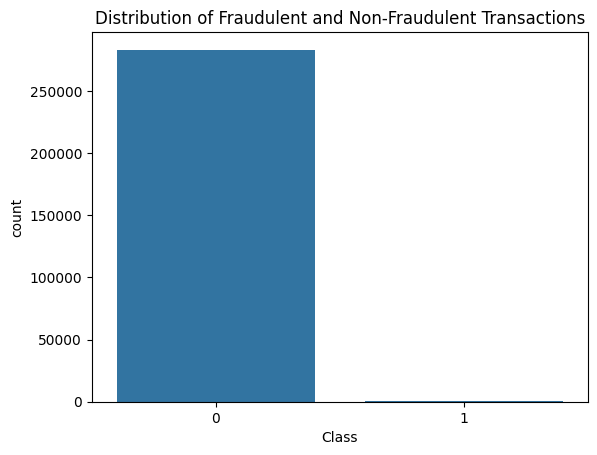

In [ ]:


sns.countplot(x='Class', data=data_df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [ ]:
fraud = data_df[data_df['Class']== 1]
legit = data_df[data_df['Class']== 0]

In [ ]:
print(fraud.shape,legit.shape)

(473, 31) (283253, 31)


In [ ]:
print(fraud.Amount.describe())

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
print(legit.Amount.describe())

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


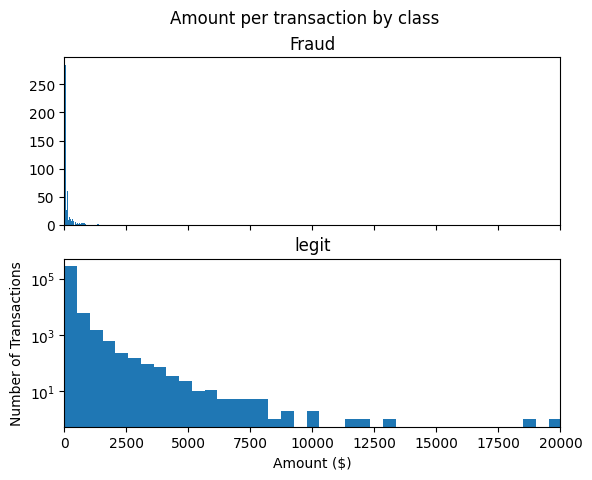

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

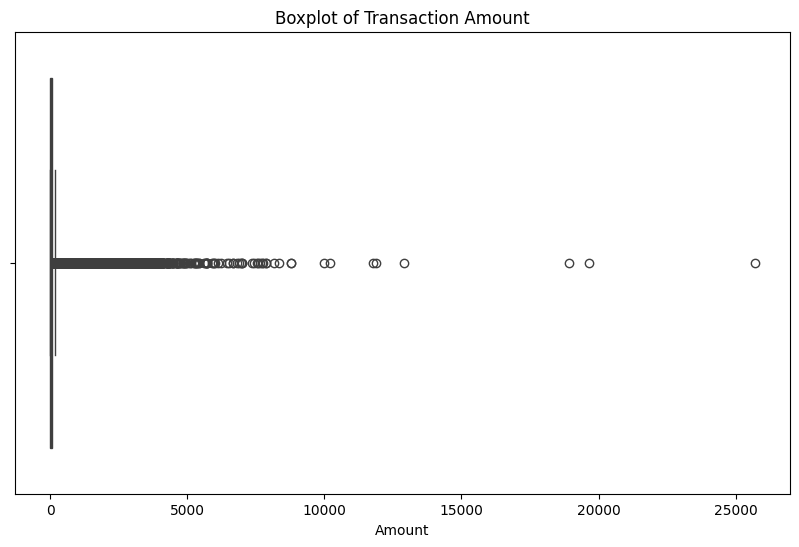

In [ ]:
# Boxplot for Amount to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

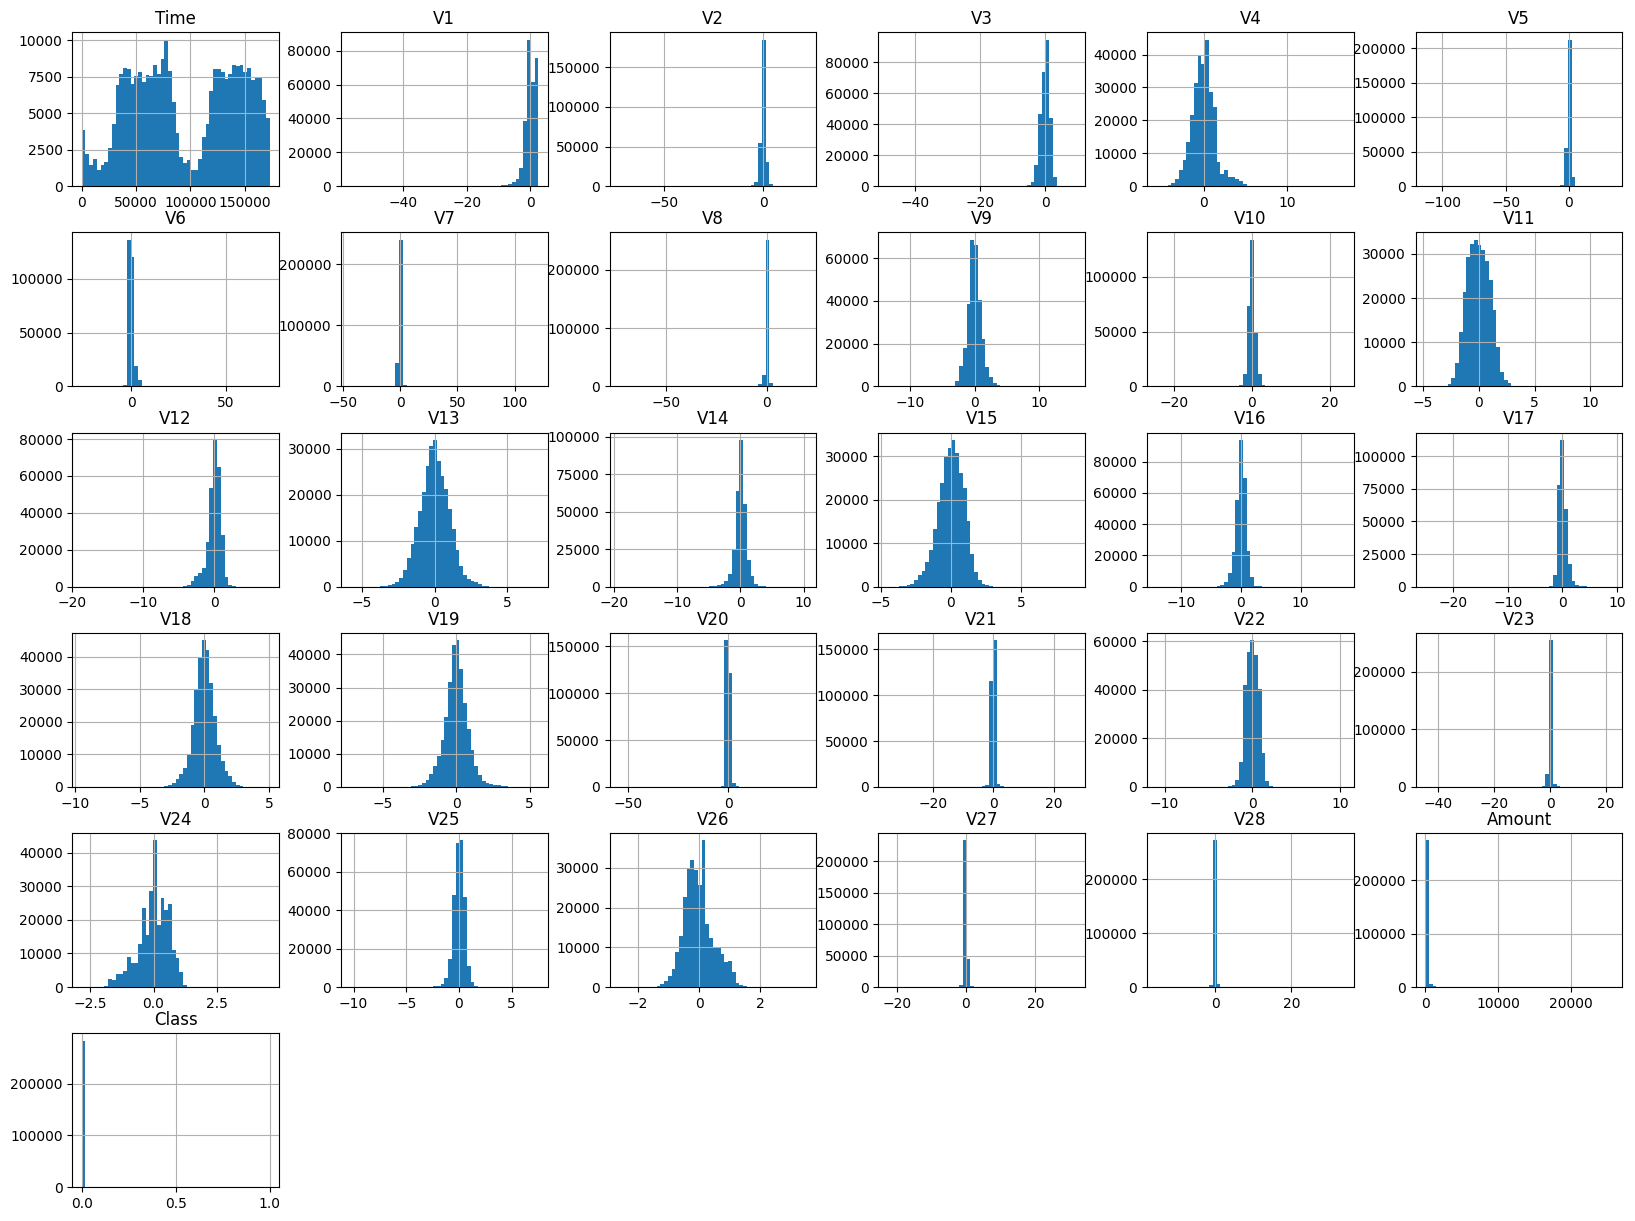

In [ ]:
data_df.hist(bins=50, figsize=(20,15))
plt.show()

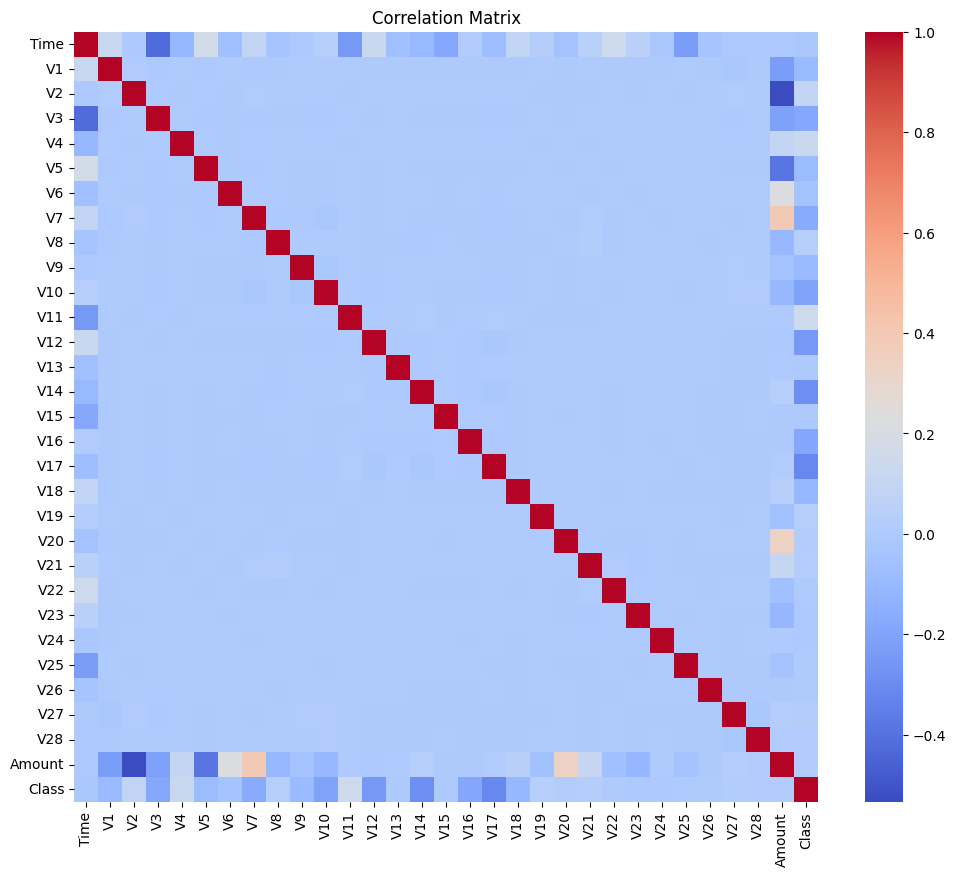

In [ ]:
# Correlation analysis
corr = data_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

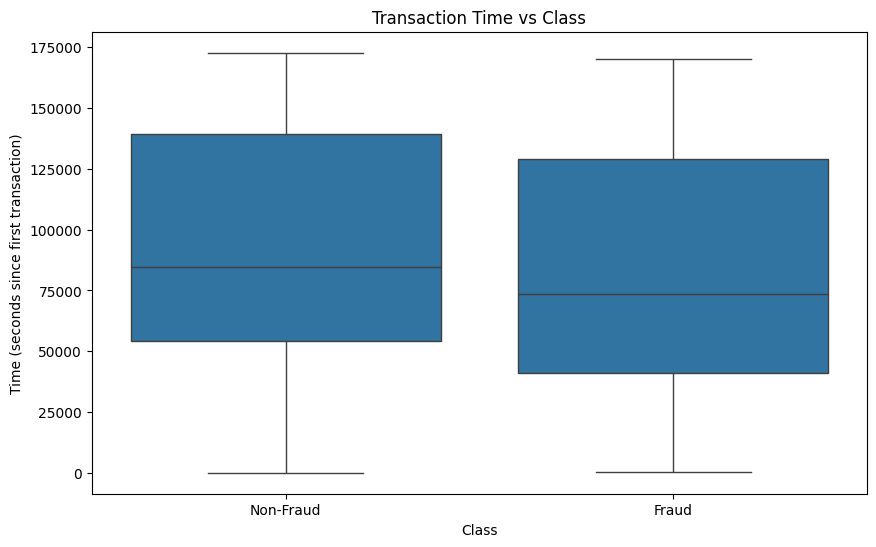

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=data_df)
plt.title('Transaction Time vs Class')
plt.xlabel('Class')
plt.ylabel('Time (seconds since first transaction)')
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])
plt.show()

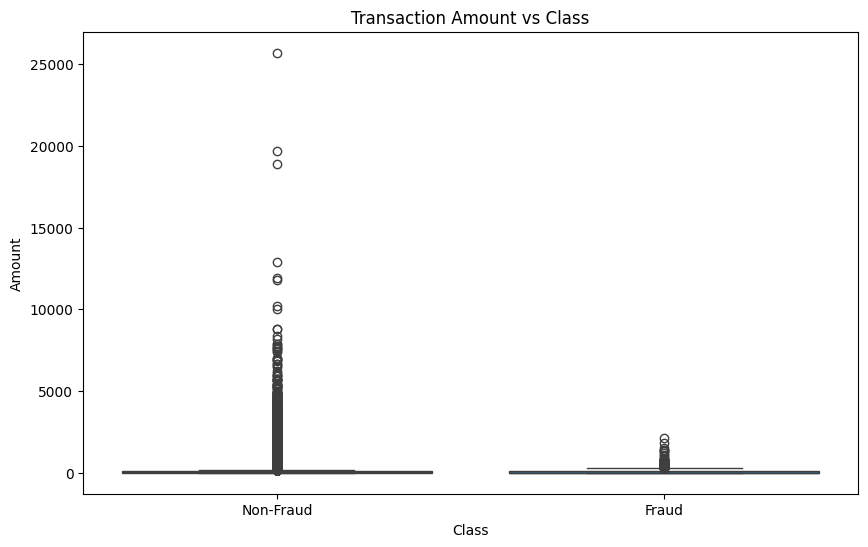

In [ ]:
# Analyzing Amount vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data_df)
plt.title('Transaction Amount vs Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])
plt.show()

# **Preprocessing Stage**

In [ ]:

# Scale the 'Amount' column
amount_values = data_df[['Amount']].values
scaler = RobustScaler()
data_df['Scaled_Amount'] = scaler.fit_transform(amount_values)

#  replacing the original columns:
data_df.drop(['Amount', 'Time'], axis=1, inplace=True)
data_df.rename(columns={'Scaled_Amount': 'Amount'}, inplace=True)

print(data_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

# ***Anomaly Detection Phase***

In [ ]:
X = data_df.drop('Class', axis=1)
y = data_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest Evaluation on Test Set:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.99      1.00     56656
  Fraudulent       0.08      0.51      0.14        90

    accuracy                           0.99     56746
   macro avg       0.54      0.75      0.57     56746
weighted avg       1.00      0.99      0.99     56746



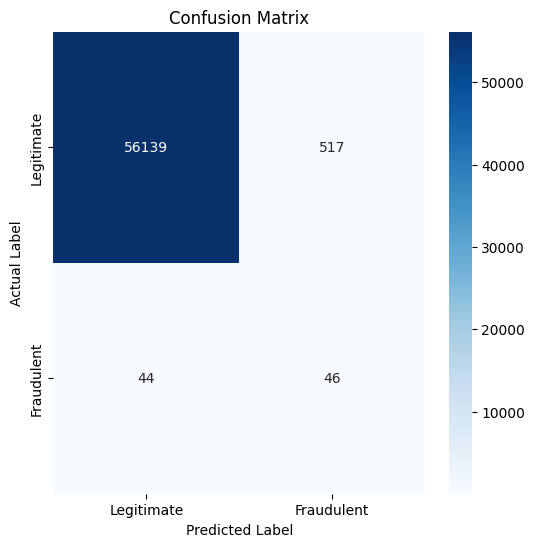

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



n_estimators = 250
contamination = 0.01
random_state = 42

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
iso_forest.fit(X_train)

# Predictions
y_train_pred = iso_forest.predict(X_train)
y_test_pred = iso_forest.predict(X_test)

# Convert predictions to binary labels
y_train_pred = np.where(y_train_pred == -1, 1, 0)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

# Get anomaly scores
iso_train_scores = iso_forest.decision_function(X_train)
iso_test_scores = iso_forest.decision_function(X_test)

# Evaluation
print("Isolation Forest Evaluation on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Legitimate', 'Fraudulent']))

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



Precision: 0.009044496851271153
Recall: 0.9112271540469974
F1 Score: 0.01791121375416987


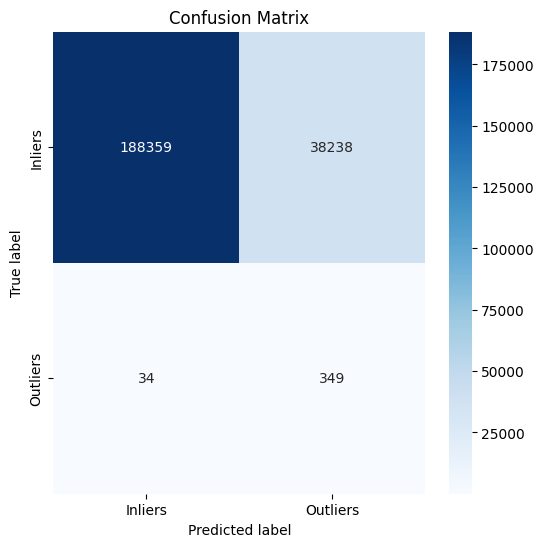

NameError: name 'anomaly_scores' is not defined

In [ ]:
#Model 2: Local Outlier Factor

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=300, contamination=0.17, novelty=False)

# Fit the model and predict outliers
y_pred = lof.fit_predict(X_train)

# Convert predictions to binary labels (1 for outliers, 0 for inliers)
y_pred_converted = np.where(y_pred == 1, 0, 1)

# Calculate evaluation metrics
precision = precision_score(y_train, y_pred_converted, pos_label=1)
recall = recall_score(y_train, y_pred_converted, pos_label=1)
f1 = f1_score(y_train, y_pred_converted, pos_label=1)

# Output the evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Anomaly scores can be approximated using the negative outlier factor. The lower, the more abnormal.
lof_anomaly_scores = -lof.negative_outlier_factor_

# Visualize the confusion matrix
cm = confusion_matrix(y_train, y_pred_converted)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Inliers', 'Outliers'], yticklabels=['Inliers', 'Outliers'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
print("Anomaly scores:", lof_anomaly_scores)

Anomaly scores: [1.23302447 1.08322306 1.14025629 ... 1.05632414 1.50348224 1.21119564]


In [ ]:
#Model 3: Auto encoder
X = data_df.drop('Class', axis=1)
y = data_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 29)]              0         
                                                                 
 encoding1 (Dense)           (None, 20)                600       
                                                                 
 encoding (Dense)            (None, 10)                210       
                                                                 
 encoder_out (Dense)         (None, 5)                 55        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Inpu

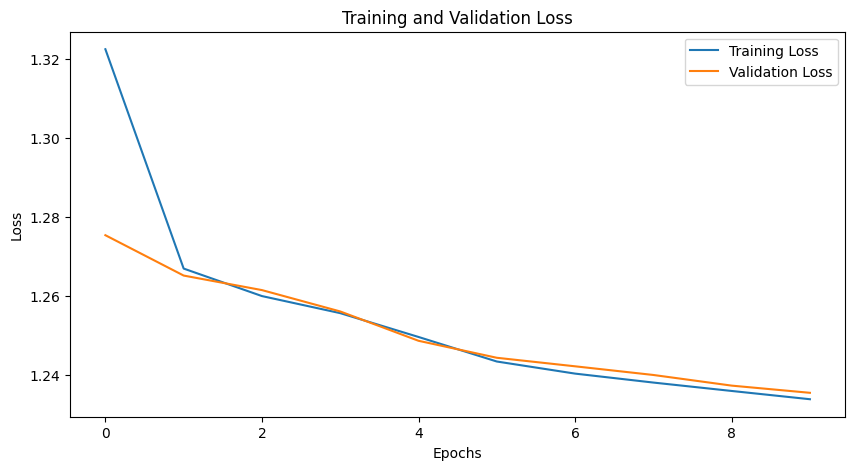

1774/1774 [==============================] - 3s 1ms/step
Reconstruction error threshold: 2.6281006293511044
Autoencoder Evaluation on Test Set:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.95      0.98     56651
  Fraudulent       0.03      0.84      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.90      0.51     56746
weighted avg       1.00      0.95      0.97     56746

Confusion Matrix:
[[53910  2741]
 [   15    80]]
Precision: 0.03
Recall: 0.84
F1-Score: 0.05
Anomaly Scores for Training Data: 123581    0.104091
216404    0.282620
108407    0.643130
228433    0.362500
275405    0.208958
            ...   
130161    1.323304
29334     0.206296
190781    0.836642
99197     0.334230
126918    0.166850
Length: 226980, dtype: float64
Anomaly Scores for Test Data: 102912    0.712080
76392     0.727643
112585    0.902622
112015    0.531259
201038    0.415861
            ..

In [ ]:

# Model architecture
batch_size = 32
original_dim = 29
latent_dim = 5
intermediate_dim1 = 20
intermediate_dim2 = 10
epochs = 10

x = Input(shape=(original_dim,), name="input")
h1 = Dense(intermediate_dim1, activation="tanh", name="encoding1", activity_regularizer=regularizers.l1(10e-5))(x)
h = Dense(intermediate_dim2, activation='relu', name="encoding")(h1)
z = Dense(latent_dim, activation='relu', name="encoder_out")(h)

encoder = Model(x, z, name="encoder")
encoder.summary()

decoder_h = Dense(intermediate_dim2, activation='relu', name="decoding1")(z)
decoder_h1 = Dense(intermediate_dim1, activation='tanh', name="decoding2")(decoder_h)
x_decoded = Dense(original_dim, activation='sigmoid', name="decoder_out")(decoder_h1)

autoencoder = Model(x, x_decoded)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Training
history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1).history

# Extract loss values
loss = history['loss']
val_loss = history['val_loss']

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Reconstruction error
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)
train_reconstruction_error = np.mean(np.square(X_train - X_train_pred), axis=1)
test_reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)
threshold = np.percentile(train_reconstruction_error, 95)
print(f"Reconstruction error threshold: {threshold}")

# Anomaly detection
y_train_pred = (train_reconstruction_error > threshold).astype(int)
y_test_pred = (test_reconstruction_error > threshold).astype(int)

# Evaluation
print("Autoencoder Evaluation on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Legitimate', 'Fraudulent']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print(f"Precision: {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.2f}")

# Output anomaly scores
print("Anomaly Scores for Training Data:", train_reconstruction_error)
print("Anomaly Scores for Test Data:", test_reconstruction_error)

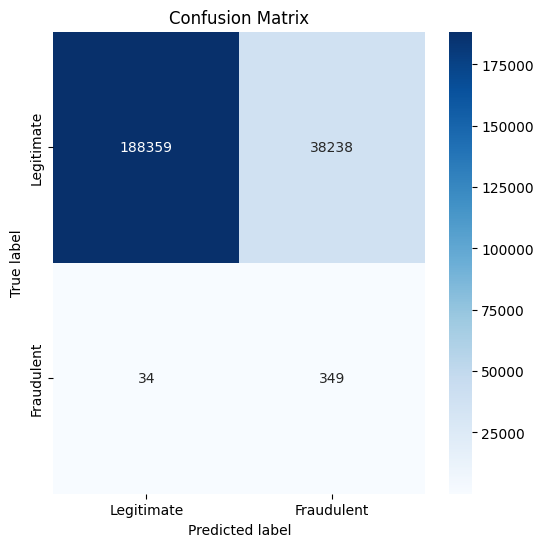

In [ ]:

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# **Predictive stage**

